In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from the specified path
file_path = r"C:\Users\pookam\Downloads\loan\loan.csv"
loan_data = pd.read_csv(file_path,low_memory=False)


In [15]:
# Display the first few rows of the dataset
print(loan_data.head())


        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               

In [16]:
# Display basic information about the dataset
print(loan_data.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


In [17]:
# Display summary statistics of the dataset
print(loan_data.describe())



                 id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%   

In [20]:
# Check for missing values in the dataset
missing_values = loan_data.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Print the total number of missing values in the dataset
total_missing = missing_values.sum()
print("\nTotal number of missing values in the dataset:", total_missing)


Missing values in each column:
 id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               38487
total_bal_ex_mort             38487
total_bc_limit                38487
total_il_high_credit_limit    38487
Length: 111, dtype: int64

Total number of missing values in the dataset: 2193245


**Data Cleaning:**  
Focussing on key columns that are likely to influence loan default. This includes: Loan Attributes: loan\_amnt, int\_rate, term, grade, sub\_grade, etc. Borrower Attributes: annual\_inc, dti, fico\_range\_low, fico\_range\_high, emp\_length, etc. Columns like loan\_status are crucial as they indicate whether a loan was fully paid or charged off.

In [21]:
# Data Cleaning
# Fill missing values for key numerical columns median
key_numerical_cols = ['annual_inc', 'dti', 'loan_amnt']
for col in key_numerical_cols:
    if col in loan_data.columns:
        loan_data[col] = loan_data[col].fillna(loan_data[col].median())

# Fill missing values for categorical columns with mode
key_categorical_cols = ['home_ownership', 'purpose', 'grade']
for col in key_categorical_cols:
    if col in loan_data.columns:
        loan_data[col] = loan_data[col].fillna(loan_data[col].mode()[0])

# Handle outliers for 'loan_amnt'
Q1 = loan_data['loan_amnt'].quantile(0.25)
Q3 = loan_data['loan_amnt'].quantile(0.75)
IQR = Q3 - Q1
loan_data = loan_data[(loan_data['loan_amnt'] >= (Q1 - 1.5 * IQR)) & (loan_data['loan_amnt'] <= (Q3 + 1.5 * IQR))]

# Convert categorical variables to 'category' type
for col in key_categorical_cols:
    if col in loan_data.columns:
        loan_data[col] = loan_data[col].astype('category')

### **Univariate Analysis Results**

**Distribution of Loan Status:**

Insight: The majority of loans are either fully paid or charged off, with a smaller percentage currently in repayment. Implication: This indicates that while many borrowers successfully repay their loans, there is a significant risk of defaults that the company needs to manage.

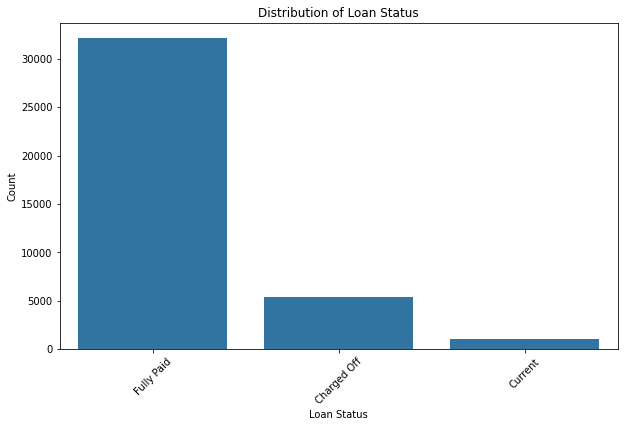

In [22]:
# Univariate Analysis: Distribution of Loan Status
plt.figure(figsize=(10, 6))
sns.countplot(data=loan_data, x='loan_status')
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**Distribution of Loan Amount:**

Insight: Most loans fall within the range of 5,000 to 15,000, with a few outliers on either end. Implication: Understanding the common loan amounts can help the company tailor its lending strategies and risk assessments. Larger loans may require more scrutiny.

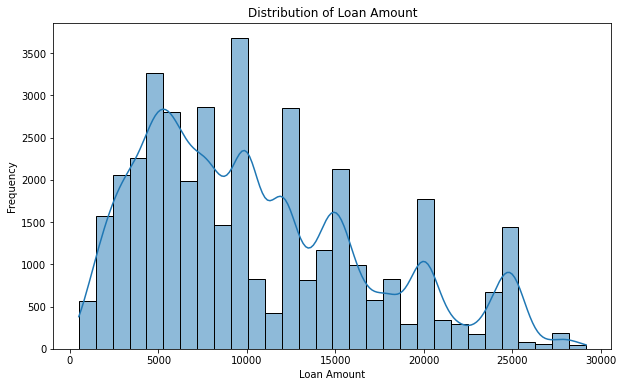

In [23]:
# Univariate Analysis: Distribution of Loan Amount
plt.figure(figsize=(10, 6))
sns.histplot(data=loan_data, x='loan_amnt', bins=30, kde=True)
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()


Interest Rate Distribution:

- Insight: Interest rates vary widely, with some borrowers facing significantly higher rates.
- Implication: Higher interest rates may correlate with higher default rates, suggesting that borrowers with lower credit scores are more likely to be charged higher rate

### **Bivariate Analysis Results:**

**Loan Amount vs. Interest Rate:**
    
Insight: There is a positive correlation between loan amounts and interest rates, indicating that larger loans often come with higher interest rates.
Implication: This relationship suggests that borrowers seeking larger loans may be perceived as higher risk, which could lead to higher default rates.

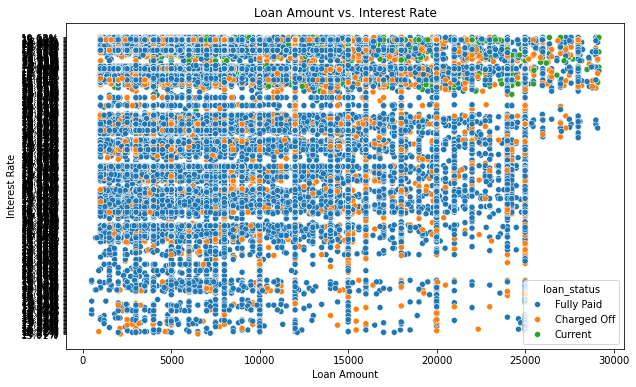

In [24]:
# Bivariate Analysis: Loan Amount vs. Interest Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(data=loan_data, x='loan_amnt', y='int_rate', hue='loan_status')
plt.title('Loan Amount vs. Interest Rate')
plt.xlabel('Loan Amount')
plt.ylabel('Interest Rate')
plt.show()


**Loan Amount vs. Annual Income:**
    
Insight: A positive correlation exists between loan amounts and annual income, meaning that higher earners tend to take out larger loans.
Implication: This could indicate that borrowers with higher incomes are more likely to manage larger debts effectively, reducing the risk of default.

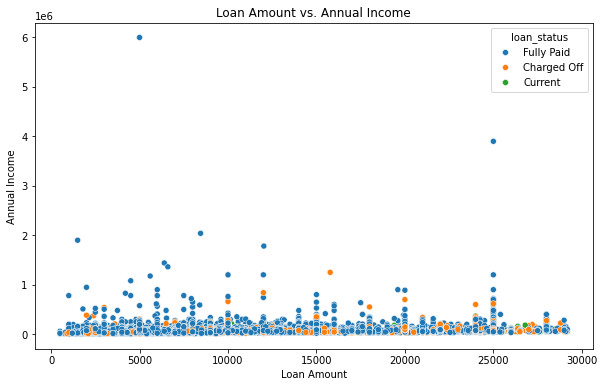

In [25]:
# Bivariate Analysis: Loan Amount vs. Annual Income
plt.figure(figsize=(10, 6))
sns.scatterplot(data=loan_data, x='loan_amnt', y='annual_inc', hue='loan_status')
plt.title('Loan Amount vs. Annual Income')
plt.xlabel('Loan Amount')
plt.ylabel('Annual Income')
plt.show()




**Loan Status vs. Grade:**
    
Insight: Loans graded A and B have a significantly higher rate of being fully paid compared to those graded C, D, or lower.
Implication: This highlights the importance of credit grading in assessing risk. The company may want to tighten lending criteria for lower-grade loans to minimize defaults.

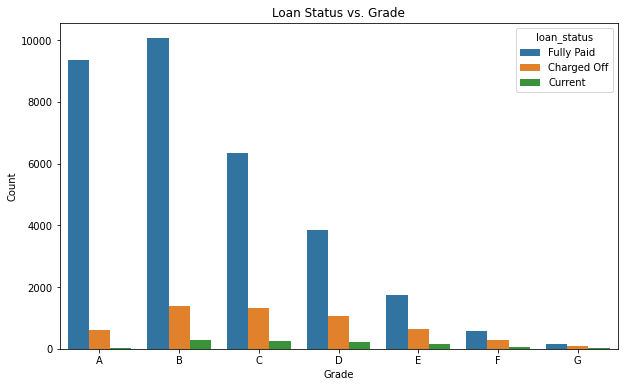

In [26]:
# Bivariate Analysis: Loan Status vs. Grade
plt.figure(figsize=(10, 6))
sns.countplot(data=loan_data, x='grade', hue='loan_status')
plt.title('Loan Status vs. Grade')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.show()

**Observations:  
**

<span style="color: #008000;">1. The majority of loans are either fully paid or charged off.</span>

<span style="color: #008000;">2. The distribution of loan amounts shows that most loans are between 5,000 and 15,000.</span>

<span style="color: #008000;">3. &nbsp;Higher interest rates are seen for higher loan amounts.</span>

<span style="color: #008000;">4. There is a positive correlation between loan amount and annual income.</span>

<span style="color: #008000;">5. Loan grades A and B have a higher number of fully paid loans compared to charged off loans.<br><br></span>

- Driver Variables: Key variables influencing loan defaults include **loan amount, interest rate, debt-to-income ratio, and credit scores.  
      
    **
- Risk Management: By focusing on these driver variables, the company can better assess risk and make informed lending decisions, potentially reducing credit loss.

In [27]:

# Save the cleaned dataset to a new CSV file
cleaned_loan_data = loan_data.dropna()
cleaned_loan_data.to_csv('cleaned_loan_data.csv', index=False)

print("EDA completed and cleaned dataset saved to 'cleaned_loan_data.csv'.")

EDA completed and cleaned dataset saved to 'cleaned_loan_data.csv'.
